<a href="https://colab.research.google.com/github/qsquentinsmith/BigDataScience/blob/master/02_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      INET4710 Lab 2 - Machine Learning 


### Submitted by: Quentin Smith (smit8819) 

# 1. Data

Using the dataset from [this](https://www.kaggle.com/sakshigoyal7/credit-card-customers) Kaggle competition.

### About the Data

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

"Churned" in banking means a time of inactivity and decreased usage.

# 2. Data Importation and Cleaning

In [1]:
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/qsquentinsmith/BigDataScience/master/data/BankChurners.csv")

# Drop last two columns per Kaggle website
df = df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [2]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [4]:
df.shape

(10127, 21)

# 3. Data Exploration

## 3.1 Plot your data

We will plot our data to see overall trends within the data set. 

In [5]:
# Import the packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Add two columns to show existing customers and attrited customers for the matrix graphs
# Remove clientnum
#remove attrition flag



# existing = df['Attrition_Flag']
# existing.replace('Attrited Customer', 0, inplace = True)
# existing.replace('Existing Customer', 1, inplace = True)


# attrite = df['Attrition_Flag']
# attrited.replace('Attrited Customer', 1, inplace = True)
# attrited.replace('Existing Customer', 0, inplace = True)




# df_existing = df[df['Attrition_Flag'] =='Existing Customer']
# df_attrited = df[df['Attrition_Flag'] == 'Attrited Customer']

First, let us see if any variable is a predictor of the target value Attrition_Flag.

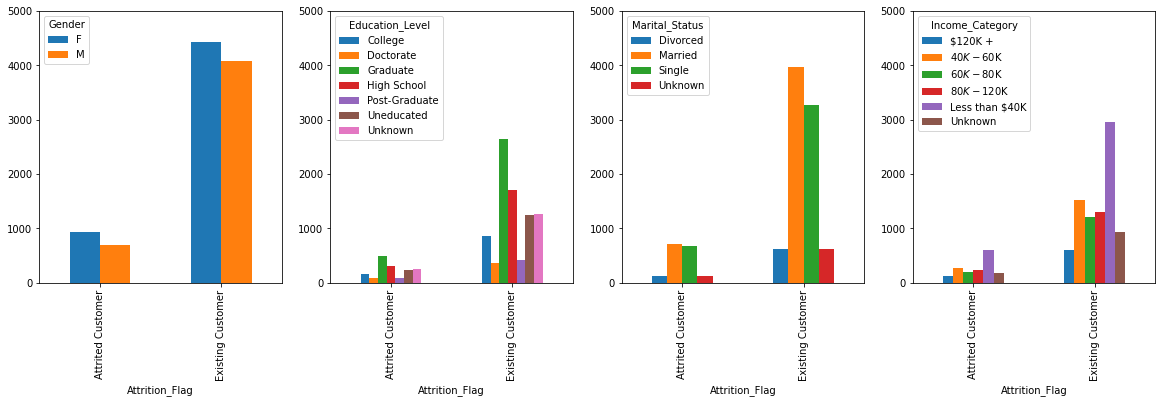

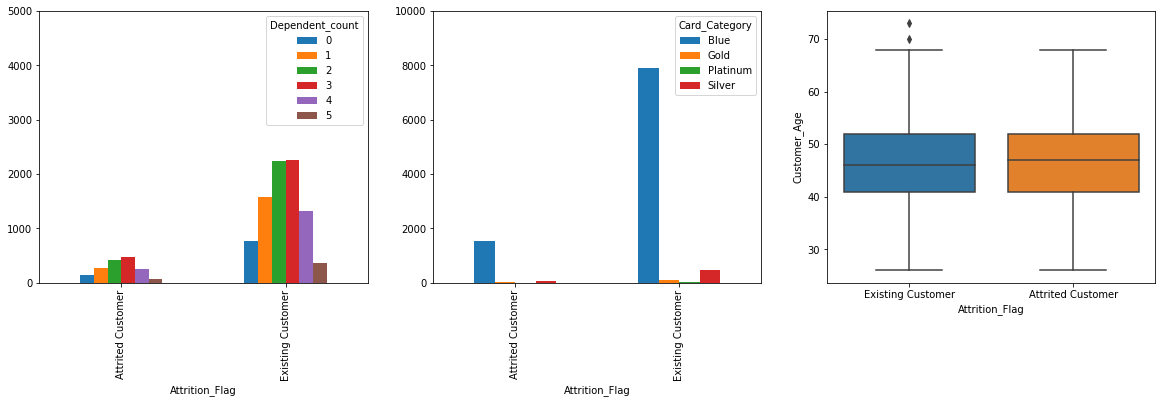

In [7]:
# Show attrition numbers related to Gender, Education Level, Marital Status, Income Category, 
# Dependent Count, Card Category, and Age 
# Resource: https://www.kaggle.com/paotografi/customer-churn-eda-95-acc-and-85-recall

fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = df,x='Attrition_Flag',y='Customer_Age', ax=ax3)

The next two graphs show correlation between each data label. The first scatter matrix is messy. The heat map after will show if there is correlation between two variables. 

In [8]:
#Change Attrition Flag to numbers

df['Attrition_Flag'].replace('Existing Customer', 1, inplace = True)
df['Attrition_Flag'].replace('Attrited Customer', 0, inplace = True)

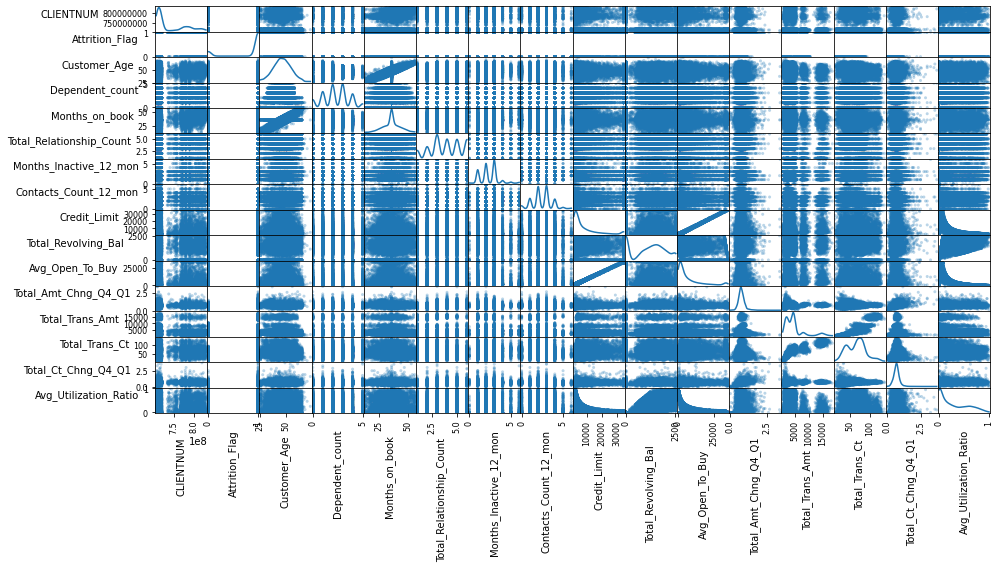

In [9]:
import pandas as pd

axes = pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

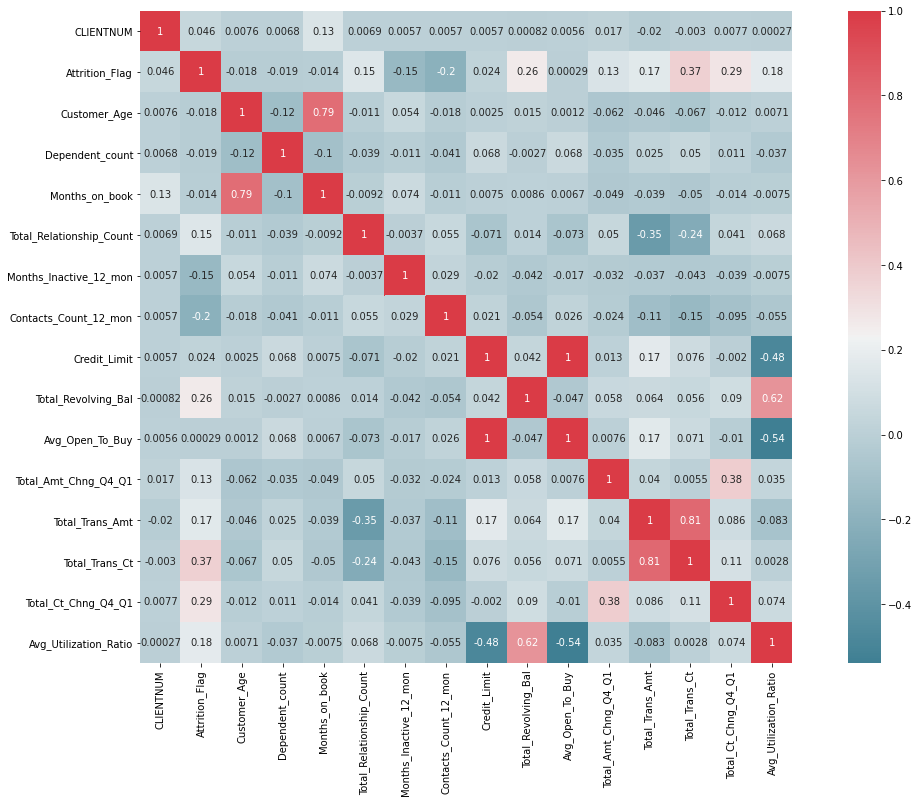

In [10]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 12))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

Through data exploration we see is that the data is really not even. There are a lot of existing customers but not many attrited customers. 

Other observations- there are correlations between certain variables:
Card utilization is a good indicator of an existing customer. We see that avg_Utilization_Ratio is correlated with Total_Revolving_Bal. It also has negative correlation with Credit Limit, and Avg_Open_To_Buy

In [11]:
df['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

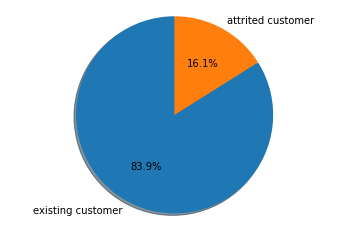

In [12]:
#Show Uneven Data Set

labels = 'existing customer', 'attrited customer'
fig1, ax1 = plt.subplots()
ax1.pie(df['Attrition_Flag'].value_counts(),labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 4. Data Modeling

The data exploration shows a big difference between attrited customers and existing customers. We will use SMOTE to even up the data

### 4.1 Compare SMOTE to original data

In [18]:
# Import the package
# import imblearn
from imblearn.over_sampling import SMOTE

# Apply SMOTE
sm = SMOTE(random_state=2)

In [40]:
# Compare SMOTE to original data
# Resource: https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html

# Split data set into two (Existing Customer, Attrited Customer)
y = df['Attrition_Flag']

# Remove string type columns
X = df.drop(columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

print('Attrition Counts before SMOTE:')
print(y.value_counts(), '\n')

X_res, y_res = sm.fit_resample(X, y)

unique, frequency = np.unique(y_res, return_counts = True)
count = np.asarray((unique, frequency)).T

print('Attrition Counts AFTER SMOTE:')
print(count[1][0], '\t', count[1][1])
print(count[0][0], '\t', count[0][1], '\n')

Attrition Counts before SMOTE:
1    8500
0    1627
Name: Attrition_Flag, dtype: int64 

Attrition Counts AFTER SMOTE:
1 	 8500
0 	 8500 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 4.2 Using ML classification

We need to clean up the data based on what we found out by the data exploration. We will keep any columns that have a high positive or negative correlation with Attrition_Flag. We will chose variables x < -0.2 and x > 0.2

In [41]:
df1 = df
df1 = df1.drop(columns = ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy'])
df1.head(5)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,M,High School,Married,$60K - $80K,Blue,5,1,3,777,1.335,1144,42,1.625,0.061
1,1,F,Graduate,Single,Less than $40K,Blue,6,1,2,864,1.541,1291,33,3.714,0.105
2,1,M,Graduate,Married,$80K - $120K,Blue,4,1,0,0,2.594,1887,20,2.333,0.000
3,1,F,High School,Unknown,Less than $40K,Blue,3,4,1,2517,1.405,1171,20,2.333,0.760
4,1,M,Uneducated,Married,$60K - $80K,Blue,5,1,0,0,2.175,816,28,2.500,0.000


In [42]:
#further drop all string type or convert
df2 = df1
df2 = df2.drop(columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])
df2.head(5)


,Attrition_Flag,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,5,1,3,777,1.335,1144,42,1.625,0.061
1,1,6,1,2,864,1.541,1291,33,3.714,0.105
2,1,4,1,0,0,2.594,1887,20,2.333,0.000
3,1,3,4,1,2517,1.405,1171,20,2.333,0.760
4,1,5,1,0,0,2.175,816,28,2.500,0.000


In [43]:
# Import the packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, svm, metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Classification Report LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.72      0.52      0.60       384
           1       0.92      0.96      0.94      2148

    accuracy                           0.90      2532
   macro avg       0.82      0.74      0.77      2532
weighted avg       0.89      0.90      0.89      2532


Confusion matrix:



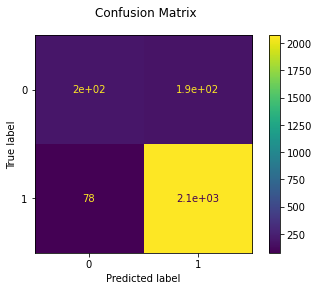

In [44]:
# Create the training and testing sets
churn_colnames = df2.columns[1:]
churn_colnames
X_train, X_test, y_train, y_test = train_test_split(df2[churn_colnames], df2['Attrition_Flag'], random_state=0)

# #Standardize
# scaler = StandardScalar()
# scaler.fit(X_train)
# X_train = scalar.transform(X_train)
# X_test = scalar.transform(X_test)

# Fit a logistic regression model to our data
clf = LogisticRegression(solver='liblinear',
                         multi_class='ovr', 
                         random_state = 0)

clf.fit(X_train, y_train)

# Obtain model predictions
# The second class is the highest score so it will be the prediction for this data

predicted = clf.predict(X_test)

# Print the classifcation report and confusion matrix
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

print(f"Classification Report {clf}:\n" f"{classification_report(y_test, predicted)}\n")

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n")

plt.show()

### 4.3 Logistic regression combined with SMOTE

In [45]:
# use a logistic regression combined with SMOTE
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE


# Define which resampling method and which ML model to use in the pipeline
blsm = BorderlineSMOTE()
logistic = LogisticRegression()

# Define the pipeline and combine SMOTE with the Logistic Regression model
pipe = Pipeline([('blsm', blsm),
                ('logistic', logistic)])



### 4.4 Using a pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

Classification Report LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.44      0.82      0.57       384
           1       0.96      0.81      0.88      2148

    accuracy                           0.81      2532
   macro avg       0.70      0.82      0.72      2532
weighted avg       0.88      0.81      0.83      2532


Confusion matrix:



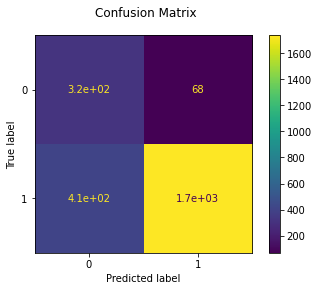

In [46]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(df2[churn_colnames], df2['Attrition_Flag'], random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipe.fit(X_train, y_train)

# Obtain the results from the classification report and confusion matrix 

predicted = pipe.predict(X_test)

print(f"Classification Report {clf}:\n" f"{classification_report(y_test, predicted)}\n")

disp = metrics.plot_confusion_matrix(pipe, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n")

plt.show()


### 4.4 Random Forest Classifier 

In [47]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df2[churn_colnames], df2['Attrition_Flag'], random_state=0)

# Define the model as the random forest
randomForest = RandomForestClassifier()

In [48]:
# Fit the model to our training set
randomForest.fit(X_train, y_train)

# Obtain predictions from the test data 
prediction = randomForest.predict(X_test)


In [49]:
from sklearn.metrics import accuracy_score

In [50]:
# Print the accuracy performance metric
print("Accuracy:\n", accuracy_score(y_test, prediction))

Accuracy:
 0.9612954186413902


### 4.5 Performance metrics for the RF model

AUCROC Curve Score:
0.9842628559512726

Classification Report LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       384
           1       0.97      0.98      0.98      2148

    accuracy                           0.96      2532
   macro avg       0.93      0.91      0.92      2532
weighted avg       0.96      0.96      0.96      2532


Confusion matrix:



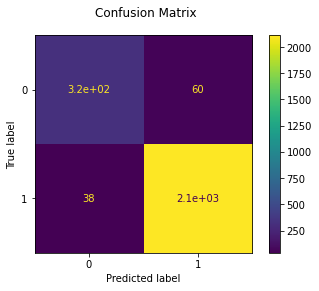

In [51]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
prediction = randomForest.predict(X_test)

# Predict probabilities
predict_prob = randomForest.predict_proba(X_test)

# Print the AUCROC curve score, classification report and confusion matrix
print(f"AUCROC Curve Score:\n" f"{roc_auc_score(y_test, predict_prob[:,1])}\n")

print(f"Classification Report {clf}:\n" f"{classification_report(y_test, prediction)}\n")

disp = metrics.plot_confusion_matrix(randomForest, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n")

plt.show()


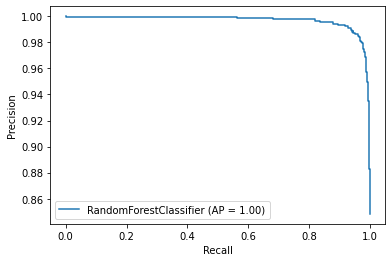

In [52]:
# Plot the Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

disp = plot_precision_recall_curve(randomForest, X_test, y_test)


Average precision-recall score: 0.97


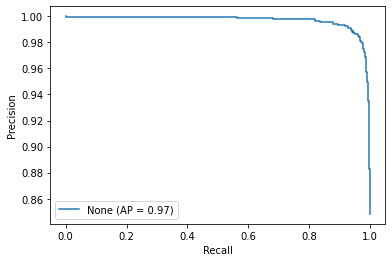

In [60]:
# Import the packages
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve, PrecisionRecallDisplay

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, predict_prob[:,1])

# Plot the recall precision tradeoff
disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision, estimator_name=None).plot()

In [61]:
# Create and print true and false positive rates
# True Positive Rate = TPR or Sensitivity or Recall
# False Positives = FPR or Fallout

TP = 329
FP = 55
FN = 37
TN = 2111

TPR = TP / (TP + FN)
FPR = FP / (FP + TN) 

print("TPR: ", round(TPR, 3))
print("FPR: ", round(FPR, 3))

TPR:  0.899
FPR:  0.025


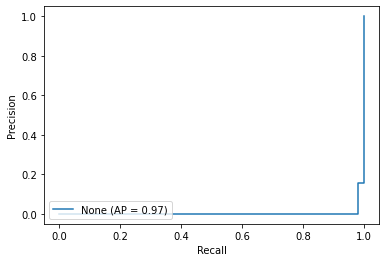

In [63]:
# Plot ROC curve
precision, recall, _ = roc_curve(y_test, prediction)
disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=average_precision, estimator_name=None)
disp.plot() 

### 4.6 Model adjustments

AUCROC Curve Score:
0.9840591781114215

Classification Report LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       384
           1       0.97      0.98      0.97      2148

    accuracy                           0.96      2532
   macro avg       0.93      0.90      0.91      2532
weighted avg       0.96      0.96      0.96      2532


Confusion matrix:



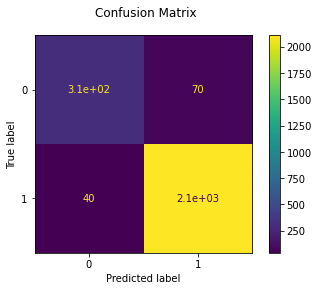

In [64]:
# Define the model with balanced subsample
rf_clf = RandomForestClassifier(class_weight = "balanced_subsample")

# Fit your training model to your training set
rf_clf.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
prediction = rf_clf.predict(X_test)
predict_prob = rf_clf.predict_proba(X_test)


# Print the roc_auc_score, the classification report and confusion matrix
print(f"AUCROC Curve Score:\n" f"{roc_auc_score(y_test, predict_prob[:,1])}\n")

print(f"Classification Report {clf}:\n" f"{classification_report(y_test, prediction)}\n")

disp = metrics.plot_confusion_matrix(rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n")

plt.show()


### 4.7 GridSearchCV to find optimal parameters

In [65]:
# Import the package
from sklearn.model_selection import GridSearchCV


In [66]:
# Define the parameter sets to test
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}

# Define the model to use (Support Vector Machine)
base_estimator = RandomForestClassifier()

# Combine the parameter sets with the defined model
gs = GridSearchCV(base_estimator, param_grid)                

# Fit the model to our training data and obtain best parameters
gs.fit(X_train, y_train)

gs.best_params_

{'max_depth': 10, 'min_samples_split': 5}

### 4.8 Model results using GridSearchCV

AUCROC Curve Score:
0.9830680671942892

Classification Report LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       384
           1       0.98      0.97      0.97      2148

    accuracy                           0.95      2532
   macro avg       0.90      0.93      0.91      2532
weighted avg       0.96      0.95      0.96      2532


Confusion matrix:



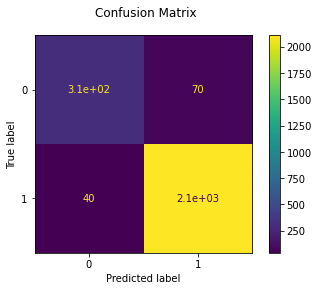

In [67]:
# Input the optimal parameters in the model
rf_optimal_clf = RandomForestClassifier(class_weight = "balanced_subsample", max_depth = 10, min_samples_split = 5)

# Get results from your model

# Fit your training model to your training set
rf_optimal_clf.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
prediction = rf_optimal_clf.predict(X_test)
predict_prob = rf_optimal_clf.predict_proba(X_test)


# Print the roc_auc_score, the classification report and confusion matrix
print(f"AUCROC Curve Score:\n" f"{roc_auc_score(y_test, predict_prob[:,1])}\n")

print(f"Classification Report {clf}:\n" f"{classification_report(y_test, prediction)}\n")

disp = metrics.plot_confusion_matrix(rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n")

plt.show()


### 4.9 Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Weights:  [0.99437957 0.12181425 0.99193694 ... 0.9347991  0.98537745 0.85156035] 

Classification Report LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       384
           1       0.91      0.96      0.94      2148

    accuracy                           0.89      2532
   macro avg       0.80      0.72      0.75      2532
weighted avg       0.88      0.89      0.88      2532


Confusion matrix:



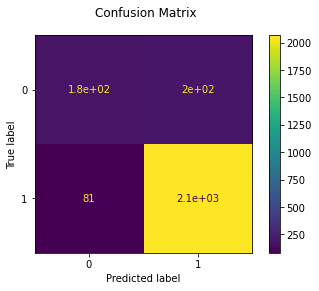

In [68]:
# Define the Logistic Regression model with weights
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
predict = lr_clf.predict(X_test)
predict_prob = lr_clf.predict_proba(X_test)

print("Weights: " ,predict_prob[:,1], "\n")

# Get the model results
print(f"Classification Report {lr_clf}:\n" f"{classification_report(y_test, predict)}\n")

disp = metrics.plot_confusion_matrix(lr_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n")

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
# Import the package
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier 
from sklearn.model_selection import cross_val_score

# Standardize

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define the three classifiers to use in the ensemble
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
dt_clf = DecisionTreeClassifier()

# Combine the classifiers in the ensemble model

e_clf = VotingClassifier(
    estimators=[('log', log_clf), ('rf', rf_clf), ('dt', dt_clf)],
    voting='hard')


# Get the results 

for clf, label in zip([log_clf, rf_clf, dt_clf, e_clf], ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Ensemble']):
     scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))



Accuracy: 0.90 (+/- 0.01) [Logistic Regression]
Accuracy: 0.96 (+/- 0.01) [Random Forest]
Accuracy: 0.93 (+/- 0.00) [Decision Tree]
Accuracy: 0.95 (+/- 0.01) [Ensemble]


In [72]:
#Use SMOTE to balance
blsm = BorderlineSMOTE()

X_res, y_res = blsm.fit_resample(X_train, y_train)

# Standardize
scaler = preprocessing.StandardScaler()
scaler.fit(X_res)
X_res = scaler.transform(X_res)
X_test = scaler.transform(X_test)


# Define the ensemble model with parameters

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(class_weight = "balanced_subsample", max_depth = 10, min_samples_split = 5)
dt_clf = DecisionTreeClassifier()

e_clf = VotingClassifier(
    estimators=[('log', log_clf), ('rf', rf_clf), ('dt', dt_clf)],
    voting='hard')

# Get the results 

for clf, label in zip([log_clf, rf_clf, dt_clf, e_clf], ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Ensemble']):
     scores = cross_val_score(clf, X_res, y_res, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.81 (+/- 0.01) [Logistic Regression]
Accuracy: 0.97 (+/- 0.01) [Random Forest]
Accuracy: 0.94 (+/- 0.04) [Decision Tree]
Accuracy: 0.96 (+/- 0.01) [Ensemble]


# 5. Conclusion

I learned and used various new tools: Numpy, Pandas, Matplotlib, sklearn, SMOTE, StandardScalar, etc. 
I learned and used different models: Logistic Regression, Random Forest, Decision Tree, Voting Classifier.

There are various things I need to clean up with this code. There are new techniques I need to use and put into practice even when not prompted to do so. Using algorithms to better choose features is a big one that stands out at me. 

My findings show that when using SMOTE to balance the data and using an ensemble technique to run three different models the highest accuracy I achieve is 0.96%. While this looks good on paper I would be highly suspect of this finding based upon my slopiness in the document. There are a lot of things that could have gone wrong such as not balancing or scaling the features correctly.

Overall I'll take what I learned from this lab and apply it to the Lab 3.